In [1]:
import os
import sympy as sy
import numpy as np
import pandas as pd
import numpy.linalg as la
from numpy import cosh, sinh
import scipy.optimize as opt
from IPython.display import display, HTML
import random

from matplotlib import pyplot as plt
import matplotlib as mpl
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 12}
mpl.rc('font', **font)

np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.5g" % x))

#save = r'C:\Users\reape\Desktop\Sp24\NPRE 455\CP3\\'

In [2]:
#Part A
SigmaT = 0.1
XisA = np.array([0.43335,0.01918,0.64384])
d = -1/SigmaT*np.log(1-XisA)

stack = np.vstack((XisA, d)).T

dfA = pd.DataFrame(stack, columns=['Xi Value', 'd [cm]'])
display(dfA)

,Xi Value,d [cm]
0,0.43335,5.680134
1,0.01918,0.193663
2,0.64384,10.323752


Mean distance [cm] for N=5: 6.912338538836887


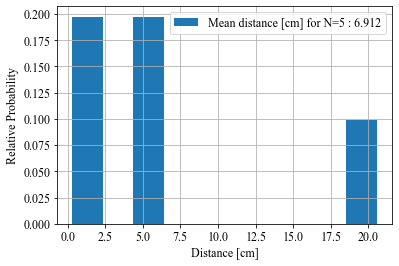

Mean distance [cm] for N=50: 10.7339323870827


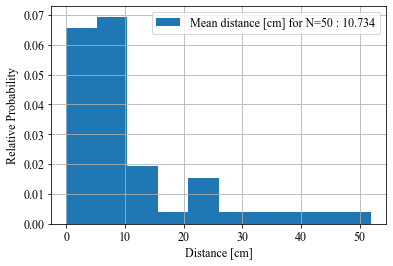

Mean distance [cm] for N=500: 9.994408325577062


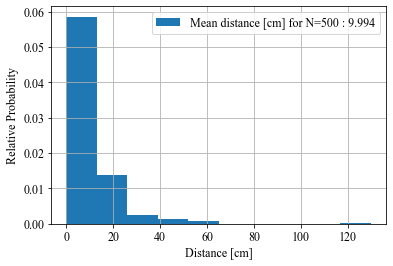

Mean distance [cm] for N=5000: 9.99122488219792


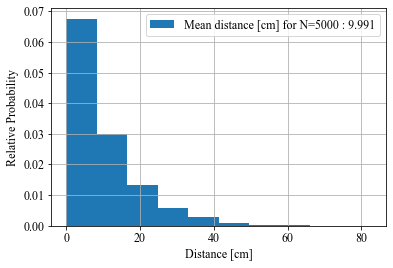

In [3]:
#Part B
def d_gen(xi):
    -1/SigmaT*np.log(1-xi)

N_arr = [5, 50, 500, 5000]
N_dict = {5:[], 50:[], 500:[], 5000:[]}

for i in range(len(N_arr)):
    N = N_arr[i]
    a = -1/SigmaT*np.log(1-np.random.rand(N))
    mean = np.mean(a)
    print('Mean distance [cm] for N={}:'.format(N), mean)
    
    plt.hist(a, density=True, label='Mean distance [cm] for N={} : {}'.format(N,round(mean,3)))
    plt.xlabel('Distance [cm]'), plt.ylabel('Relative Probability')
    plt.grid(), plt.legend()
#    plt.savefig(save+'1b{}'.format(N), dpi=600)
    plt.show()

In [4]:
#Part C
XisC = np.array([0.43335,0.01918,0.64384,0.99381,0.81001])
rxn = np.empty(0)

total = 244+337+28+119

for Xi in XisC:
    if Xi <= (244)/total: print('Rxn 0: Capture')
    elif Xi <= (244+337)/total: print('Rxn 1: Fission')
    elif Xi <= (244+337+28)/total: print('Rxn 2: Inelastic Scatter')
    else: print('Rxn 3: Elastic Scatter')

Rxn 1: Fission
Rxn 0: Capture
Rxn 1: Fission
Rxn 3: Elastic Scatter
Rxn 2: Inelastic Scatter


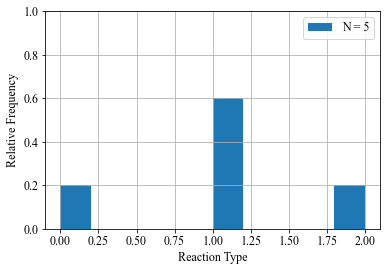

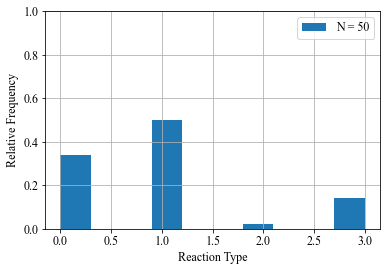

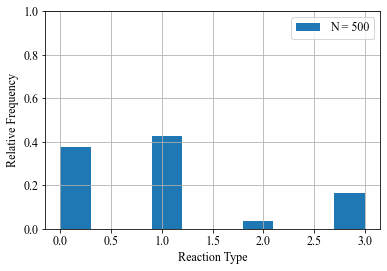

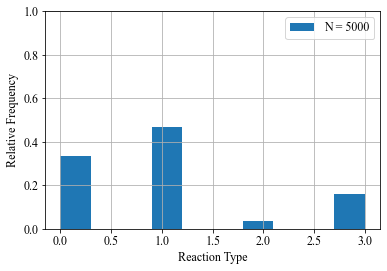

In [5]:
#Part D
for N in N_arr:
    counts = np.empty(0)
    a = np.random.rand(N)
    for xi in a:
        if xi <= (244)/total: counts = np.append(counts,0)
        elif xi <= (244+337)/total: counts = np.append(counts,1)
        elif xi <= (244+337+28)/total: counts = np.append(counts,2)
        else: counts = np.append(counts,3)
    plt.hist(counts, weights=np.ones_like(counts)/N, label='N = {}'.format(N)), plt.grid()
    plt.xlabel('Reaction Type'), plt.ylabel('Relative Frequency')
    plt.ylim(0,1), plt.legend()
#    plt.savefig(save+'1d{}'.format(N), dpi=600)
    plt.show()